## Hypothesis Testing

<span style="font-size:larger;"><b><u>Step 1 - Libraries</u></b></span>

First make sure you have the necessary libraries installed and imported. Scipy is the most import library for our purposes. It contains many functions for performing complex mathematical operations. Pandas and Numpy are also common for creating/reading/manipulating data.

In [41]:
# !conda install scipy
# !conda install pandas
# !conda install numpy
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt

<span style="font-size:larger;"><b><u>Step 2 - Data</u></b></span>

To perform any tests, first you need data. Data can be manually entered as lists or arrays, or read directly from a file (most commonly a .csv).

In [42]:
sample_data_1 = [87,84,88,92,83,83,92,88,82,87,
                 82,82,86,75,76,82,79,86,80,77]
sample_data_2 = [78,75,74,73,67,71,72,80,76,66,
                 76,73,71,78,80,79,70,73,76,79]
sample_data_3 = [92,89,93,97,88,88,97,93,87,92,87,
                 87,91,80,81,87,84,91,85,82]
df_grades = pd.DataFrame({'Section 1' :sample_data_1, 
                          'Section 2': sample_data_2, 
                          'Section 3': sample_data_3})
df_grades.head()

# alternatively
# df_grades = pd.read_csv("Grades_data.csv")
# if we already had a csv file with the relevant grades

,Section 1,Section 2,Section 3
0,87,78,92
1,84,75,89
2,88,74,93
3,92,73,97
4,83,67,88


<span style="font-size:larger;"><b><u>Step 3 - Select Test</u></b></span>

Depending on your goal, you will want to perform different types of hypothesis tests: various t-tests, ANOVAs, chi-square, etc.

There is a general format for hypothesis tests.

<b>stats.test_name(data)<b>
    
E.g. <b>stats.ttest_1samp(sample_data_1)<b>

## One sampled t-test

<b>One-sample t-test</b> determines if the sample average differs statistically from an actual or assumed population mean (parameter).

<b>Null Hypothesis (H0):</b> There is no significant difference between the mean of the sample and the hypothesized population mean 85.<br>
$H_{0}$: $\mu_1$ = 85 <br>
<b>Alternative Hypothesis (Ha):</b> There is a significant difference between the mean of the sample and 85.<br>
$H_{1}$: $\mu_1$ $\not=$ 85

We use <b>stats.ttes_1samp</b> to get the t stats and p-value.

In [43]:
#choose a population mean for your test
mu = 85

#one-sample t-test for sample 1
t_stat, p_value = stats.ttest_1samp(sample_data_1, 
                                    mu)
print(f"t = {round(t_stat, 3)}, p = {(p_value)}")
if p_value < .05:
    print('Reject the null')
else:
    print('Do not reject the null')

t = -1.355, p = 0.1912116880481934
Do not reject the null


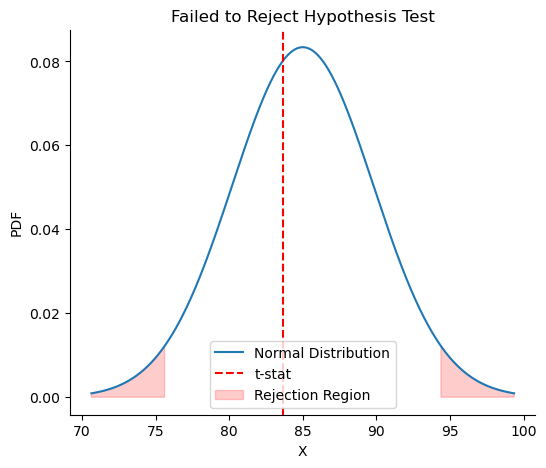

In [44]:
mu = 85
s_sigma = np.std(sample_data_1, ddof=1)

x = np.linspace(mu - 3 * s_sigma, 
                mu + 3 * s_sigma, 
                1000)

pdf = stats.norm.pdf(x, mu, s_sigma)

fig, ax = plt.subplots(figsize =(6, 5))
plt.plot(x, pdf, label='Normal Distribution')

alpha = 0.05
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax = plt.gca()
critical_value_left = stats.norm.ppf(alpha / 2, 
                                     loc=mu, 
                                     scale=s_sigma)
critical_value_right = stats.norm.ppf(1 - alpha / 2, 
                                      loc=mu, 
                                      scale=s_sigma)

plt.axvline(x=mu+t_stat, 
            color='red', 
            linestyle='--', 
            label='t-stat')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.fill_between(x, 0, pdf,
                  where=(x < critical_value_left) 
                 | (x > critical_value_right), 
                 color='red', 
                 alpha=0.2, 
                 label='Rejection Region')

plt.legend(loc='upper right')
plt.xlabel('X')
plt.ylabel('PDF')
plt.title('Failed to Reject Hypothesis Test')
plt.legend()

plt.show()


We usually set a significance level ${\alpha}$ = 0.05 as a threshold for statistical significance.<br> The p-value is greater than ${\alpha}$.<br> We conclude that there is no significant difference between the mean of sampled Section 1 students and the population mean 85.

In [45]:
#one-sample t-test for sample 2
t_stat, p_value = stats.ttest_1samp(sample_data_2, mu)
print(f"t = {round(t_stat, 3)}, p = {(p_value)}")
if p_value < .05:
    print('Reject the null')
else:
    print('Do not reject the null')

t = -11.632, p = 4.376677493507645e-10
Reject the null


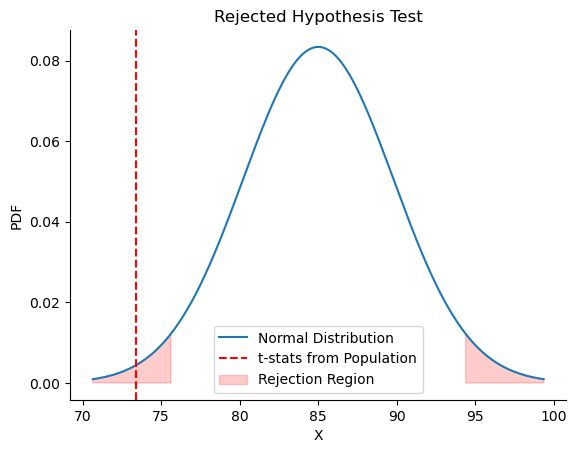

In [46]:
mu = 85
s_sigma = np.std(sample_data_1, ddof=1)

x = np.linspace(mu - 3 * s_sigma, 
                mu + 3 * s_sigma, 
                1000)

pdf = stats.norm.pdf(x, mu, s_sigma)

plt.plot(x, pdf, label='Normal Distribution')
ax = plt.gca()
alpha = 0.05

critical_value_left = stats.norm.ppf(alpha / 2, 
                                     loc=mu, 
                                     scale=s_sigma)
critical_value_right = stats.norm.ppf(1 - alpha / 2, 
                                      loc=mu, 
                                      scale=s_sigma)
plt.axvline(x=mu+t_stat, 
            color='red', 
            linestyle='--', 
            label='t-stats from Population')

plt.fill_between(x, 0, pdf, 
                 where=(x < critical_value_left) 
                 | (x > critical_value_right), 
                 color='red', 
                 alpha=0.2, 
                 label='Rejection Region')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('X')
plt.ylabel('PDF')
plt.title('Rejected Hypothesis Test')
plt.legend()

plt.show()

The p-value is less than significance level.<br> We conclude that there is a significant difference between the mean of sampled Section 2 students and the population mean 85.

## Two sampled t-test

<b>Two-sample t-test</b> analyses the mean values of two independent samples and determines if there is a significant difference between the population means.

<b>Null Hypothesis (H0):</b> There is no significant difference between the means of the two groups.<br>
$H_{0}$: $\mu_1$ = $\mu_2$ <br>
<b>Alternative Hypothesis (Ha):</b> There is a significant difference between the means of the two groups.<br>
$H_{1}$: $\mu_1$ $\not=$ $\mu_2$

In [47]:
mean1 = np.mean(sample_data_1)  
mean2 = np.mean(sample_data_2)
# sample means:
mean1,mean2

(83.55, 74.35)

We use <b>stats.ttes_ind</b> to get the t stats and p-value.

In [48]:
t_test,p_val = stats.ttest_ind(sample_data_1, 
                               sample_data_2)  
t_test,p_val

(6.533381182423901, 1.0594126010385184e-07)

We have $t_{stat}$ = 6.5333 and p-value ≈ 0.0000.<br>
Our p-value from the test < ${\alpha}$, so we reject $H_{0}$.<br>
There is a significant difference between the average grades of Section 1 and Section 2.

## Paired sampled t-test

<b>Paired sampled t-test</b> compares the means of two related or paired groups. It is used when we have two sets of measurements on the same subjects under different conditions or time points.

Section 2 students formed study sessions after school. We sampled grades of Section 2 students before and after their study sessions. 

In [49]:
sample_data_2_before = [78,75,74,73,67,71,72,80,76,66,
                        76,73,71,78,80,79,70,73,76,79]
sample_data_2_after = [85,84,89,90,81,82,85,78,87,83,
                       87,87,78,80,81,84,84,91,82,79]

<b>Null Hypothesis (H0):</b> There is no significant difference between the means of the paired observations.<br>
$H_{0}$: $\mu_{before}$ = $\mu_{after}$ <br>
<b>Alternative Hypothesis (Ha):</b> There is a significant difference between the means of the paired observations.<br>
$H_{1}$: $\mu_{before}$ $\not=$ $\mu_{after}$

We use <b>stats.ttest_rel</b> to get the t stats and p-value.

In [50]:
t_statistic, p_value = stats.ttest_rel(sample_data_2_before, 
                                       sample_data_2_after)
t_statistic, p_value

(-7.044925096071777, 1.0491494998947268e-06)

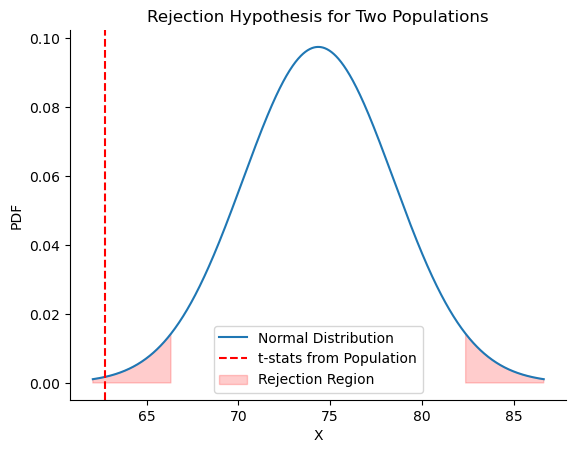

In [57]:
mu = mean1 = np.mean(sample_data_2_before)  
s_sigma = np.std(sample_data_2, ddof=1)

x = np.linspace(mu - 3 * s_sigma, 
                mu + 3 * s_sigma, 
                1000)

pdf = stats.norm.pdf(x, mu, s_sigma)

plt.plot(x, pdf, label='Normal Distribution')
ax = plt.gca()
alpha = 0.05

critical_value_left = stats.norm.ppf(alpha / 2, 
                                     loc=mu, 
                                     scale=s_sigma)
critical_value_right = stats.norm.ppf(1 - alpha / 2, 
                                      loc=mu, 
                                      scale=s_sigma)
plt.axvline(x=mu+t_stat, 
            color='red', 
            linestyle='--', 
            label='t-stats from Population')

plt.fill_between(x, 0, pdf, 
                 where=(x < critical_value_left) 
                 | (x > critical_value_right), 
                 color='red', 
                 alpha=0.2, 
                 label='Rejection Region')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xlabel('X')
plt.ylabel('PDF')
plt.title('Rejection Hypothesis for Two Populations')
plt.legend()

plt.show()

We have $t_{stat}$ = -7.0449 and p-value ≈ 0.0000.<br>
Our p-value from the test < ${\alpha}$, so we reject $H_{0}$.<br>
There is a significant difference between the average grades of Section 2 students before and after the study sessions.

## ANOVA F Test

<b>ANOVA F Test</b> compares the means of three or more groups to see if there are statistically significant differences between them. 

<b>Null Hypothesis (H0):</b> There is no significant difference between the means of the groups.<br>
$H_{0}$: $\mu_1$ = $\mu_2$ = $\mu_3$ <br>
<b>Alternative Hypothesis (Ha):</b> At least one group mean is significantly different from the others.<br>
$H_{1}$: at least one $\mu_i$ is different

In [51]:
f_stat, p_value = stats.f_oneway(sample_data_1, 
                                 sample_data_2, 
                                 sample_data_3)  
print(f"F = {round(f_stat, 3)}, p = {(p_value)}")
if p_value < .05:
    print('Reject the null')
else:
    print('Do not reject the null')

F = 49.765, p = 3.136202549309574e-13
Reject the null


p-value ≈ 0.0000<br>
Our p-value from the test < ${\alpha}$, so we reject $H_{0}$.<br>
There is at least one Section mean significantly different from the others.